In [20]:
#import necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import reshape
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("water_dataX.csv", encoding= 'unicode_escape')
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [22]:
#conversions
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [23]:
#initialization
start=2
end=1779
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5]  
co = df.iloc [start:end ,6].astype(np.float64)   
  
year=df.iloc[start:end,11]
tc=df.iloc [2:end ,10].astype(np.float64)


bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [24]:
df=pd.concat([station,location,state,do,ph,co,bod,na,tc],axis=1)
df. columns = ['station','location','state','do','ph','co','bod','na','tc']

In [25]:
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

df.head()
df.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [26]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 

df['quality']=df.wqi.apply(lambda x:(1 if (75>=x>=0)  
#                                  else('Good' if  (50>=x>=26) 
#                                       else('Poor' if (75>=x>=51)
#                                           else('Very Poor' if (100>=x>=76) 
                                              else 0))#)))

In [27]:
df.quality.value_counts()

0    1138
1     639
Name: quality, dtype: int64

In [28]:
df = df.dropna()
df.isna().sum()

station     0
location    0
state       0
do          0
ph          0
co          0
bod         0
na          0
tc          0
npH         0
ndo         0
nco         0
nbdo        0
nec         0
nna         0
wph         0
wdo         0
wbdo        0
wec         0
wna         0
wco         0
wqi         0
quality     0
dtype: int64

In [29]:
#input columns
import tensorflow as tf
from keras.utils import np_utils

input_cols1 = ["npH","ndo","nbdo","nec","nna","nco"]
X = df[input_cols1]
y = df['wqi']
print(X.shape, y.shape)

(1495, 6) (1495,)


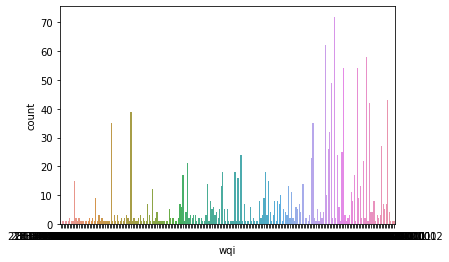

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y)



In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7) #I have split this into 75-25 ratio

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
import tensorflow as tf
import keras
from keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.000001)

def ann_model():
    ann = keras.models.Sequential()
    
    ann.add(Dense(8, input_dim=6,activation="relu"))
    
    ann.add(Dense(16, activation="relu"))
    
    ann.add(Dense(64, activation="relu"))
    ann.add(Dense(1))

    ann.compile(optimizer='adam',loss = 'mse', metrics=['accuracy','mse'])
    
    return ann

model = ann_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Declaring optimizers and learning rates for our models


history = model.fit(
    X_train,
    y_train,
    batch_size=32, 
    epochs=150,
    validation_data=(X_test,y_test)
    #callbacks=[learning_rate_reduction]
    )

Epoch 1/150
38/38 [==============================] - 1s 9ms/step - loss: 2053.9968 - accuracy: 0.0000e+00 - mse: 2053.9968 - val_loss: 367.4347 - val_accuracy: 0.0000e+00 - val_mse: 367.4347
Epoch 2/150
38/38 [==============================] - 0s 8ms/step - loss: 315.5633 - accuracy: 0.0000e+00 - mse: 315.5633 - val_loss: 248.4006 - val_accuracy: 0.0000e+00 - val_mse: 248.4006
Epoch 3/150
38/38 [==============================] - 0s 6ms/step - loss: 223.5484 - accuracy: 0.0000e+00 - mse: 223.5484 - val_loss: 194.1905 - val_accuracy: 0.0000e+00 - val_mse: 194.1905
Epoch 4/150
38/38 [==============================] - 0s 5ms/step - loss: 173.2987 - accuracy: 0.0000e+00 - mse: 173.2987 - val_loss: 142.2466 - val_accuracy: 0.0000e+00 - val_mse: 142.2466
Epoch 5/150
38/38 [==============================] - 0s 5ms/step - loss: 108.8470 - accuracy: 0.0000e+00 - mse: 108.8470 - val_loss: 75.9969 - val_accuracy: 0.0000e+00 - val_mse: 75.9969
Epoch 6/150
38/38 [==============================] - 0s

Epoch 46/150
38/38 [==============================] - 0s 7ms/step - loss: 0.8807 - accuracy: 0.0000e+00 - mse: 0.8807 - val_loss: 0.7951 - val_accuracy: 0.0000e+00 - val_mse: 0.7951
Epoch 47/150
38/38 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.0000e+00 - mse: 0.8941 - val_loss: 0.7596 - val_accuracy: 0.0000e+00 - val_mse: 0.7596
Epoch 48/150
38/38 [==============================] - 0s 5ms/step - loss: 0.8510 - accuracy: 0.0000e+00 - mse: 0.8510 - val_loss: 0.7055 - val_accuracy: 0.0000e+00 - val_mse: 0.7055
Epoch 49/150
38/38 [==============================] - 0s 5ms/step - loss: 0.8084 - accuracy: 0.0000e+00 - mse: 0.8084 - val_loss: 0.7736 - val_accuracy: 0.0000e+00 - val_mse: 0.7736
Epoch 50/150
38/38 [==============================] - 0s 5ms/step - loss: 0.8072 - accuracy: 0.0000e+00 - mse: 0.8072 - val_loss: 0.6872 - val_accuracy: 0.0000e+00 - val_mse: 0.6872
Epoch 51/150
38/38 [==============================] - 0s 5ms/step - loss: 0.8038 - accurac

38/38 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.0000e+00 - mse: 0.2671 - val_loss: 0.3780 - val_accuracy: 0.0000e+00 - val_mse: 0.3780
Epoch 92/150
38/38 [==============================] - 0s 7ms/step - loss: 0.2799 - accuracy: 0.0000e+00 - mse: 0.2799 - val_loss: 0.4153 - val_accuracy: 0.0000e+00 - val_mse: 0.4153
Epoch 93/150
38/38 [==============================] - 0s 8ms/step - loss: 0.2736 - accuracy: 0.0000e+00 - mse: 0.2736 - val_loss: 0.6097 - val_accuracy: 0.0000e+00 - val_mse: 0.6097
Epoch 94/150
38/38 [==============================] - 0s 7ms/step - loss: 0.3132 - accuracy: 0.0000e+00 - mse: 0.3132 - val_loss: 0.4070 - val_accuracy: 0.0000e+00 - val_mse: 0.4070
Epoch 95/150
38/38 [==============================] - 0s 7ms/step - loss: 0.2831 - accuracy: 0.0000e+00 - mse: 0.2831 - val_loss: 0.5529 - val_accuracy: 0.0000e+00 - val_mse: 0.5529
Epoch 96/150
38/38 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.0000e+00

Epoch 136/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.0000e+00 - mse: 0.1057 - val_loss: 0.2406 - val_accuracy: 0.0000e+00 - val_mse: 0.2406
Epoch 137/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1058 - accuracy: 0.0000e+00 - mse: 0.1058 - val_loss: 0.2310 - val_accuracy: 0.0000e+00 - val_mse: 0.2310
Epoch 138/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1236 - accuracy: 0.0000e+00 - mse: 0.1236 - val_loss: 0.2196 - val_accuracy: 0.0000e+00 - val_mse: 0.2196
Epoch 139/150
38/38 [==============================] - 0s 5ms/step - loss: 0.1087 - accuracy: 0.0000e+00 - mse: 0.1087 - val_loss: 0.2317 - val_accuracy: 0.0000e+00 - val_mse: 0.2317
Epoch 140/150
38/38 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.0000e+00 - mse: 0.0971 - val_loss: 0.2221 - val_accuracy: 0.0000e+00 - val_mse: 0.2221
Epoch 141/150
38/38 [==============================] - 0s 6ms/step - loss: 0.1249 - a

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([[72.75    ],
       [89.02212 ],
       [93.11901 ],
       [87.57046 ],
       [80.99615 ],
       [82.47611 ],
       [47.334106],
       [71.660645],
       [93.99777 ],
       [65.326   ],
       [88.286896],
       [70.72262 ],
       [82.47611 ],
       [71.82942 ],
       [78.56366 ],
       [93.99777 ],
       [83.361984],
       [93.66865 ],
       [81.88217 ],
       [88.286896],
       [60.787872],
       [76.20211 ],
       [82.9424  ],
       [81.88217 ],
       [82.9424  ],
       [81.88217 ],
       [88.57453 ],
       [88.286896],
       [82.9424  ],
       [55.80135 ],
       [79.04647 ],
       [82.869385],
       [82.47611 ],
       [71.38624 ],
       [85.26438 ],
       [85.26438 ],
       [72.93135 ],
       [66.58059 ],
       [82.47611 ],
       [66.75686 ],
       [67.15799 ],
       [84.28714 ],
       [93.99777 ],
       [93.99777 ],
       [77.873055],
       [71.088394],
       [84.89885 ],
       [63.68297 ],
       [82.869385],
       [50.042934],


In [36]:
test_loss = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 0.0000e+00 - mse: 0.1916


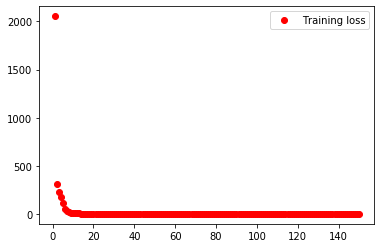

In [37]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()